In [233]:
import pandas as pd 
import matplotlib.pyplot as plt 
import math

In [234]:
beach = pd.read_csv("beaches .csv", thousands=',')

In [235]:
beach.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Beach name                  64 non-null     object 
 1   number of reviews           43 non-null     float64
 2   Country                     64 non-null     object 
 3   tripadvisor rating          43 non-null     float64
 4   instagram appeals           64 non-null     int64  
 5   ocean health index          64 non-null     int64  
 6   water and sanitation score  36 non-null     float64
 7   average yearly temperature  64 non-null     int64  
 8   average hotel price         64 non-null     int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 4.6+ KB


In [236]:
beach.head()

,Beach name,number of reviews,Country,tripadvisor rating,instagram appeals,ocean health index,water and sanitation score,average yearly temperature,average hotel price
0,Waikiki beach,18194.0,Hawaii,4.0,848161,76,NaN,26,231
1,Patong Beach,16787.0,Thailand,3.5,548930,66,59.0,26,67
2,Akumal beach,13286.0,Mexico,4.5,31671,67,58.0,21,49
3,Bavaro beach,20219.0,Dominican Republic,4.5,177717,56,42.0,25,139
4,Clearwater beach,12415.0,Florida,4.5,1022595,70,NaN,13,209


In [237]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(1,5))
beach["water"] = scaler.fit_transform(beach["ocean health index"].values.reshape(-1, 1))
beach["weather"] = scaler.fit_transform(beach["average yearly temperature"].values.reshape(-1, 1))
beach["hotel"] = scaler.fit_transform(beach["average hotel price"].values.reshape(-1, 1))

In [238]:
beach["hoteli"] = beach["average hotel price"].apply(lambda x: 400-x)
beach["hotelr"] = scaler.fit_transform(beach["hoteli"].values.reshape(-1, 1))

In [239]:
scaler = MinMaxScaler(feature_range=(1,5))
beach["hashtag"] = scaler.fit_transform(beach["instagram appeals"].values.reshape(-1, 1))

In [240]:
beach = beach.round(2)

In [241]:
beach.head()

,Beach name,number of reviews,Country,tripadvisor rating,instagram appeals,ocean health index,water and sanitation score,average yearly temperature,average hotel price,water,weather,hotel,hoteli,hotelr,hashtag
0,Waikiki beach,18194.0,Hawaii,4.0,848161,76,NaN,26,231,3.86,4.56,3.42,169,2.58,1.42
1,Patong Beach,16787.0,Thailand,3.5,548930,66,59.0,26,67,2.43,4.56,1.62,333,4.38,1.27
2,Akumal beach,13286.0,Mexico,4.5,31671,67,58.0,21,49,2.57,3.81,1.43,351,4.57,1.01
3,Bavaro beach,20219.0,Dominican Republic,4.5,177717,56,42.0,25,139,1.00,4.41,2.41,261,3.59,1.08
4,Clearwater beach,12415.0,Florida,4.5,1022595,70,NaN,13,209,3.00,2.63,3.18,191,2.82,1.51


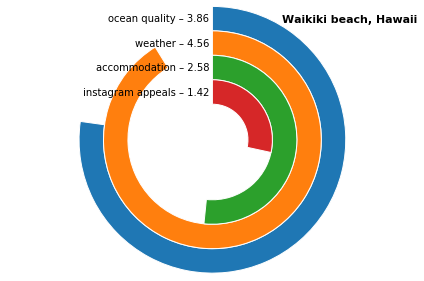

In [242]:
categories = ["ocean quality", "weather", "accommodation", "instagram appeals"]
data = beach2.loc[0, "water":"hashtag"]
n = len(data)
r = 1.5  
r_inner = 0.4  
w = (r - r_inner) / n 
colors = plt.cm.tab10.colors
fig, ax = plt.subplots()
ax.axis("equal")
for i in range(n):
    radius = r - i * w
    ax.pie([data[i] / 5 ], radius=radius, startangle=90,
           counterclock=False,
           colors=[colors[i]],
           labels=[f'{categories[i]} – {data[i]}%'], labeldistance=None,
           wedgeprops={'width': w, 'edgecolor': 'white'})
    ax.text(0, radius - w / 2, f'{categories[i]} – {data[i]} ', ha='right', va='center')
plt.tight_layout()
plt.title("Waikiki beach, Hawaii", fontsize = 11, fontweight="bold",loc='right')
plt.show()

In [243]:
def area(beach):
    min_col = {}
    max_col = {}
    for col in beach:
        max_col[col]= beach[col].max()
        min_col[col]= beach[col].min()
    result = pd.DataFrame([min_col, max_col], index=['min', 'max'])
    return result

In [244]:
print(area(beach))

       Beach name  number of reviews  Country  tripadvisor rating  \
min  Akumal beach             1851.0  Antigua                 3.5   
max     the Baths            26624.0       UK                 5.0   

     instagram appeals  ocean health index  water and sanitation score  \
min              21711                  56                        31.0   
max            7915620                  84                       100.0   

     average yearly temperature  average hotel price  water  weather  hotel  \
min                           2                   10    1.0      1.0    1.0   
max                          29                  375    5.0      5.0    5.0   

     hoteli  hotelr  hashtag  
min      25     1.0      1.0  
max     390     5.0      5.0  


In [245]:
beach2 = beach[["Beach name","water", "weather", "hotelr", "hashtag"]]
beach2.to_dict
beach2.head()

,Beach name,water,weather,hotelr,hashtag
0,Waikiki beach,3.86,4.56,2.58,1.42
1,Patong Beach,2.43,4.56,4.38,1.27
2,Akumal beach,2.57,3.81,4.57,1.01
3,Bavaro beach,1.00,4.41,3.59,1.08
4,Clearwater beach,3.00,2.63,2.82,1.51


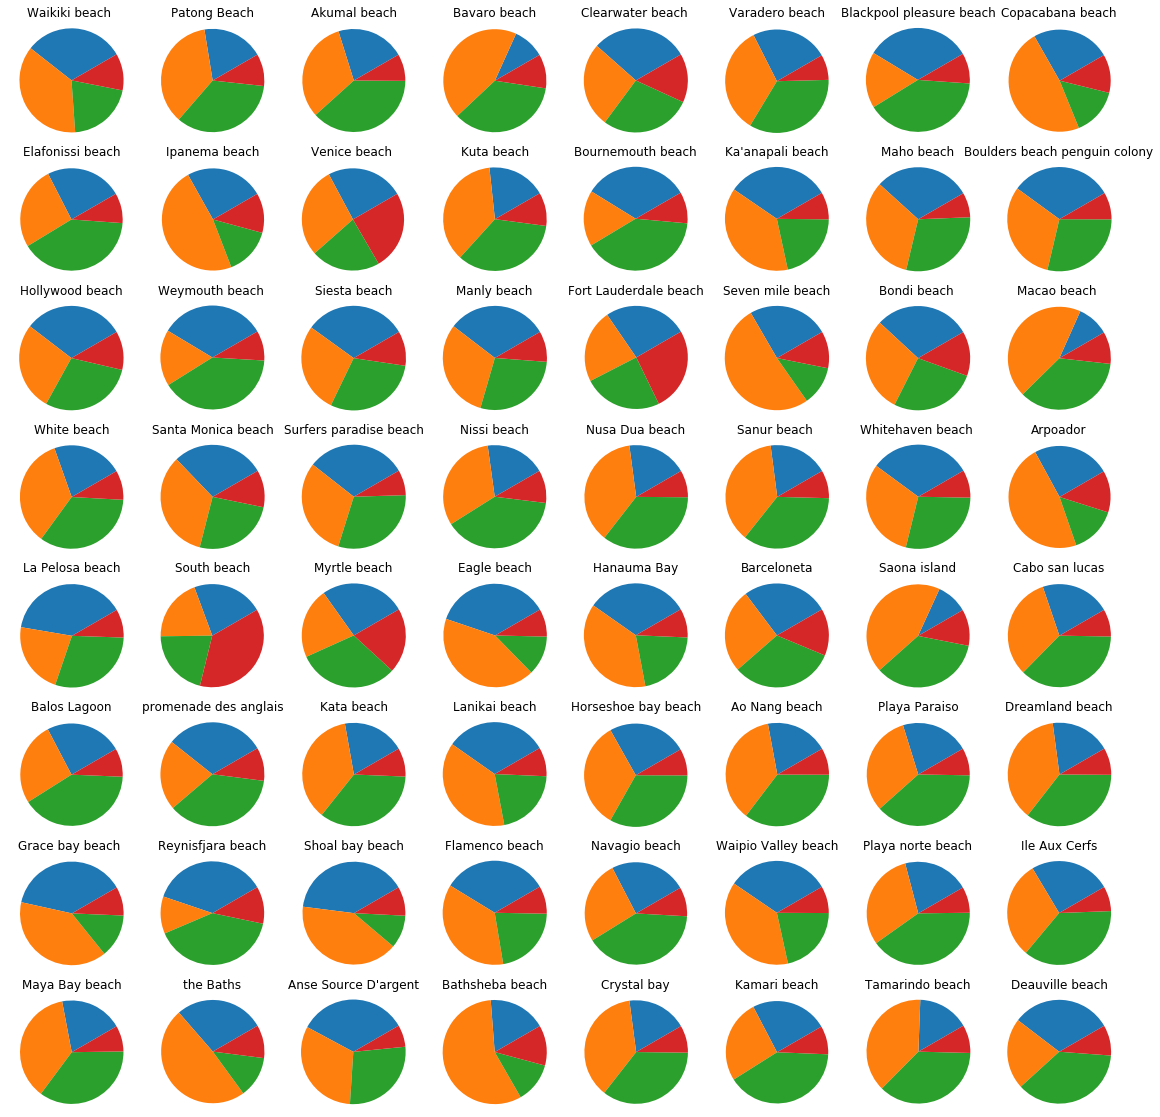

In [264]:
fig, axes = plt.subplots(8, 8, figsize=(20, 20))

for i, (idx, row) in enumerate(beach2.set_index('Beach name').iterrows()):
    ax = axes[i // 8, i % 8]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, startangle=30)
    ax.set_title(idx)
    ax.axis("equal")
fig.subplots_adjust(wspace=.1)

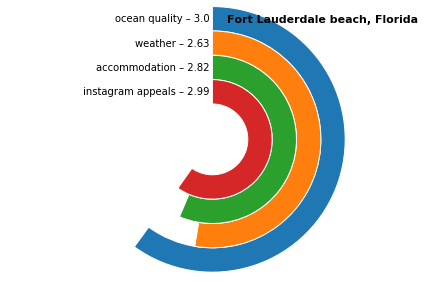

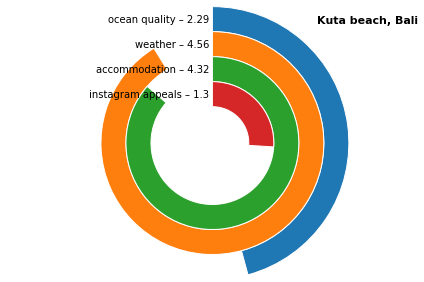

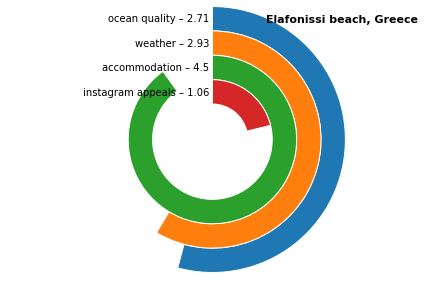

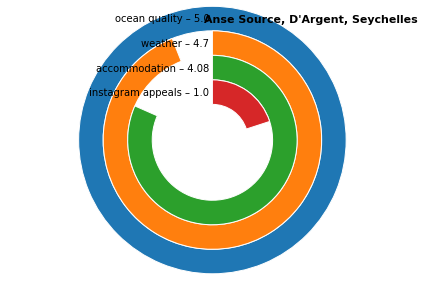

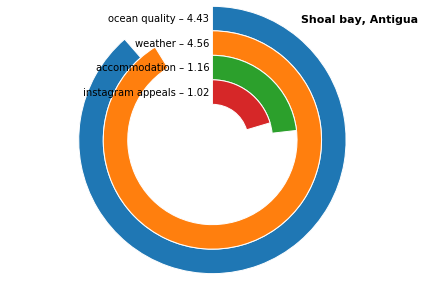

In [261]:
categories = ["ocean quality", "weather", "accommodation", "instagram appeals"]
data = beach2.loc[20, "water":"hashtag"]
n = len(data)
r = 1.5  
r_inner = 0.4  
w = (r - r_inner) / n 
colors = plt.cm.tab10.colors
fig, ax = plt.subplots()
ax.axis("equal")
for i in range(n):
    radius = r - i * w
    ax.pie([data[i] / 5 ], radius=radius, startangle=90,
           counterclock=False,
           colors=[colors[i]],
           labels=[f'{categories[i]} – {data[i]}%'], labeldistance=None,
           wedgeprops={'width': w, 'edgecolor': 'white'})
    ax.text(0, radius - w / 2, f'{categories[i]} – {data[i]} ', ha='right', va='center')
plt.tight_layout()
plt.title("Fort Lauderdale beach, Florida", fontsize = 11, fontweight="bold",loc='right')
plt.show()

categories = ["ocean quality", "weather", "accommodation", "instagram appeals"]
data = beach2.loc[11, "water":"hashtag"]
n = len(data)
r = 1.5  
r_inner = 0.4  
w = (r - r_inner) / n 
colors = plt.cm.tab10.colors
fig, ax = plt.subplots()
ax.axis("equal")
for i in range(n):
    radius = r - i * w
    ax.pie([data[i] / 5 ], radius=radius, startangle=90,
           counterclock=False,
           colors=[colors[i]],
           labels=[f'{categories[i]} – {data[i]}%'], labeldistance=None,
           wedgeprops={'width': w, 'edgecolor': 'white'})
    ax.text(0, radius - w / 2, f'{categories[i]} – {data[i]} ', ha='right', va='center')
plt.tight_layout()
plt.title("Kuta beach, Bali", fontsize = 11, fontweight="bold",loc='right')
plt.show()

categories = ["ocean quality", "weather", "accommodation", "instagram appeals"]
data = beach2.loc[8, "water":"hashtag"]
n = len(data)
r = 1.5  
r_inner = 0.4  
w = (r - r_inner) / n 
colors = plt.cm.tab10.colors
fig, ax = plt.subplots()
ax.axis("equal")
for i in range(n):
    radius = r - i * w
    ax.pie([data[i] / 5 ], radius=radius, startangle=90,
           counterclock=False,
           colors=[colors[i]],
           labels=[f'{categories[i]} – {data[i]}%'], labeldistance=None,
           wedgeprops={'width': w, 'edgecolor': 'white'})
    ax.text(0, radius - w / 2, f'{categories[i]} – {data[i]} ', ha='right', va='center')
plt.tight_layout()
plt.title("Elafonissi beach, Greece", fontsize = 11, fontweight="bold",loc='right')
plt.show()

categories = ["ocean quality", "weather", "accommodation", "instagram appeals"]
data = beach2.loc[58, "water":"hashtag"]
n = len(data)
r = 1.5  
r_inner = 0.4  
w = (r - r_inner) / n 
colors = plt.cm.tab10.colors
fig, ax = plt.subplots()
ax.axis("equal")
for i in range(n):
    radius = r - i * w
    ax.pie([data[i] / 5 ], radius=radius, startangle=90,
           counterclock=False,
           colors=[colors[i]],
           labels=[f'{categories[i]} – {data[i]}%'], labeldistance=None,
           wedgeprops={'width': w, 'edgecolor': 'white'})
    ax.text(0, radius - w / 2, f'{categories[i]} – {data[i]} ', ha='right', va='center')
plt.tight_layout()
plt.title("Anse Source, D'Argent, Seychelles", fontsize = 11, fontweight="bold",loc='right')
plt.show()

categories = ["ocean quality", "weather", "accommodation", "instagram appeals"]
data = beach2.loc[50, "water":"hashtag"]
n = len(data)
r = 1.5  
r_inner = 0.4  
w = (r - r_inner) / n 
colors = plt.cm.tab10.colors
fig, ax = plt.subplots()
ax.axis("equal")
for i in range(n):
    radius = r - i * w
    ax.pie([data[i] / 5 ], radius=radius, startangle=90,
           counterclock=False,
           colors=[colors[i]],
           labels=[f'{categories[i]} – {data[i]}%'], labeldistance=None,
           wedgeprops={'width': w, 'edgecolor': 'white'})
    ax.text(0, radius - w / 2, f'{categories[i]} – {data[i]} ', ha='right', va='center')
plt.tight_layout()
plt.title("Shoal bay, Antigua", fontsize = 11, fontweight="bold",loc='right')
plt.show()

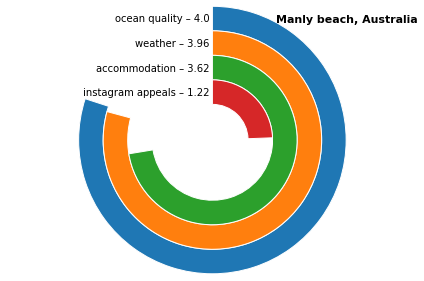

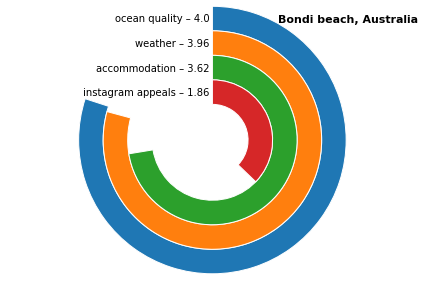

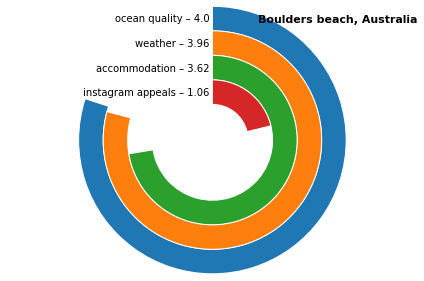

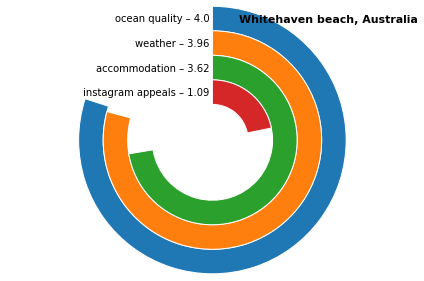

In [263]:
categories = ["ocean quality", "weather", "accommodation", "instagram appeals"]
data = beach2.loc[19, "water":"hashtag"]
n = len(data)
r = 1.5  
r_inner = 0.4  
w = (r - r_inner) / n 
colors = plt.cm.tab10.colors
fig, ax = plt.subplots()
ax.axis("equal")
for i in range(n):
    radius = r - i * w
    ax.pie([data[i] / 5 ], radius=radius, startangle=90,
           counterclock=False,
           colors=[colors[i]],
           labels=[f'{categories[i]} – {data[i]}%'], labeldistance=None,
           wedgeprops={'width': w, 'edgecolor': 'white'})
    ax.text(0, radius - w / 2, f'{categories[i]} – {data[i]} ', ha='right', va='center')
plt.tight_layout()
plt.title("Manly beach, Australia", fontsize = 11, fontweight="bold",loc='right')
plt.show()


categories = ["ocean quality", "weather", "accommodation", "instagram appeals"]
data = beach2.loc[22, "water":"hashtag"]
n = len(data)
r = 1.5  
r_inner = 0.4  
w = (r - r_inner) / n 
colors = plt.cm.tab10.colors
fig, ax = plt.subplots()
ax.axis("equal")
for i in range(n):
    radius = r - i * w
    ax.pie([data[i] / 5 ], radius=radius, startangle=90,
           counterclock=False,
           colors=[colors[i]],
           labels=[f'{categories[i]} – {data[i]}%'], labeldistance=None,
           wedgeprops={'width': w, 'edgecolor': 'white'})
    ax.text(0, radius - w / 2, f'{categories[i]} – {data[i]} ', ha='right', va='center')
plt.tight_layout()
plt.title("Bondi beach, Australia", fontsize = 11, fontweight="bold",loc='right')
plt.show()

categories = ["ocean quality", "weather", "accommodation", "instagram appeals"]
data = beach2.loc[15, "water":"hashtag"]
n = len(data)
r = 1.5  
r_inner = 0.4  
w = (r - r_inner) / n 
colors = plt.cm.tab10.colors
fig, ax = plt.subplots()
ax.axis("equal")
for i in range(n):
    radius = r - i * w
    ax.pie([data[i] / 5 ], radius=radius, startangle=90,
           counterclock=False,
           colors=[colors[i]],
           labels=[f'{categories[i]} – {data[i]}%'], labeldistance=None,
           wedgeprops={'width': w, 'edgecolor': 'white'})
    ax.text(0, radius - w / 2, f'{categories[i]} – {data[i]} ', ha='right', va='center')
plt.tight_layout()
plt.title("Boulders beach, Australia", fontsize = 11, fontweight="bold",loc='right')
plt.show()

categories = ["ocean quality", "weather", "accommodation", "instagram appeals"]
data = beach2.loc[30, "water":"hashtag"]
n = len(data)
r = 1.5  
r_inner = 0.4  
w = (r - r_inner) / n 
colors = plt.cm.tab10.colors
fig, ax = plt.subplots()
ax.axis("equal")
for i in range(n):
    radius = r - i * w
    ax.pie([data[i] / 5 ], radius=radius, startangle=90,
           counterclock=False,
           colors=[colors[i]],
           labels=[f'{categories[i]} – {data[i]}%'], labeldistance=None,
           wedgeprops={'width': w, 'edgecolor': 'white'})
    ax.text(0, radius - w / 2, f'{categories[i]} – {data[i]} ', ha='right', va='center')
plt.tight_layout()
plt.title("Whitehaven beach, Australia", fontsize = 11, fontweight="bold",loc='right')
plt.show()

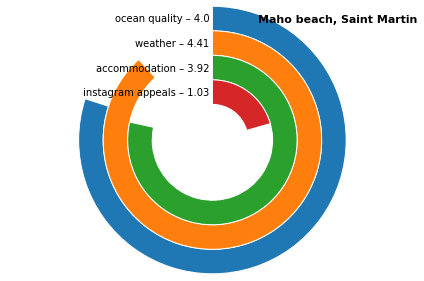

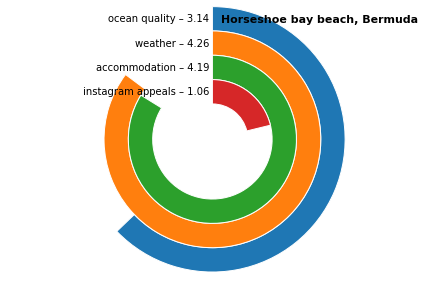

In [266]:
categories = ["ocean quality", "weather", "accommodation", "instagram appeals"]
data = beach2.loc[14, "water":"hashtag"]
n = len(data)
r = 1.5  
r_inner = 0.4  
w = (r - r_inner) / n 
colors = plt.cm.tab10.colors
fig, ax = plt.subplots()
ax.axis("equal")
for i in range(n):
    radius = r - i * w
    ax.pie([data[i] / 5 ], radius=radius, startangle=90,
           counterclock=False,
           colors=[colors[i]],
           labels=[f'{categories[i]} – {data[i]}%'], labeldistance=None,
           wedgeprops={'width': w, 'edgecolor': 'white'})
    ax.text(0, radius - w / 2, f'{categories[i]} – {data[i]} ', ha='right', va='center')
plt.tight_layout()
plt.title("Maho beach, Saint Martin", fontsize = 11, fontweight="bold",loc='right')
plt.show()

categories = ["ocean quality", "weather", "accommodation", "instagram appeals"]
data = beach2.loc[44, "water":"hashtag"]
n = len(data)
r = 1.5  
r_inner = 0.4  
w = (r - r_inner) / n 
colors = plt.cm.tab10.colors
fig, ax = plt.subplots()
ax.axis("equal")
for i in range(n):
    radius = r - i * w
    ax.pie([data[i] / 5 ], radius=radius, startangle=90,
           counterclock=False,
           colors=[colors[i]],
           labels=[f'{categories[i]} – {data[i]}%'], labeldistance=None,
           wedgeprops={'width': w, 'edgecolor': 'white'})
    ax.text(0, radius - w / 2, f'{categories[i]} – {data[i]} ', ha='right', va='center')
plt.tight_layout()
plt.title("Horseshoe bay beach, Bermuda", fontsize = 11, fontweight="bold",loc='right')
plt.show()

In [269]:
fig, axes = plt.subplots(8, 8, figsize=(20, 20))

for i, (idx, row) in enumerate(beach2.set_index('Beach name').iterrows()):
    ax = axes[i // 8, i % 8]
    row = row[row.gt(row.sum() * .01)]
    ax.bar(row, height=5, startangle=30)
    ax.set_title(idx)
    ax.axis("equal")
fig.subplots_adjust(wspace=.1)

AttributeError: 'Rectangle' object has no property 'startangle'